Processing image: images/phase2_000000000.000000.png


,colors,counts,labels,fraction
1,"[121, 254, 89]",1332314,[121 254 89],0.339876
3,"[200, 0, 0]",1324846,[200 0 0],0.337971
5,"[255, 255, 255]",1122793,[255 255 255],0.286427
2,"[192, 192, 192]",116673,[192 192 192],0.029764
4,"[222, 62, 7]",22225,[222 62 7],0.005670
0,"[0, 255, 255]",1149,[ 0 255 255],0.000293


Processing image: images/phase2_000000000.012230.png


,colors,counts,labels,fraction
1,"[121, 254, 89]",1334195,[121 254 89],0.340356
3,"[200, 0, 0]",1326921,[200 0 0],0.338500
5,"[255, 255, 255]",1122940,[255 255 255],0.286464
2,"[192, 192, 192]",116673,[192 192 192],0.029764
4,"[222, 62, 7]",18122,[222 62 7],0.004623
0,"[0, 255, 255]",1149,[ 0 255 255],0.000293


Processing image: images/phase2_000000000.078139.png


,colors,counts,labels,fraction
3,"[200, 0, 0]",1268684,[200 0 0],0.323644
1,"[121, 254, 89]",1253880,[121 254 89],0.319867
5,"[255, 255, 255]",1144895,[255 255 255],0.292065
4,"[222, 62, 7]",134719,[222 62 7],0.034367
2,"[192, 192, 192]",116673,[192 192 192],0.029764
0,"[0, 255, 255]",1149,[ 0 255 255],0.000293


Processing image: images/phase2_000000000.726308.png


,colors,counts,labels,fraction
5,"[255, 255, 255]",1152852,[255 255 255],0.294095
3,"[200, 0, 0]",1012483,[200 0 0],0.258286
1,"[121, 254, 89]",985793,[121 254 89],0.251478
4,"[222, 62, 7]",651050,[222 62 7],0.166084
2,"[192, 192, 192]",116673,[192 192 192],0.029764
0,"[0, 255, 255]",1149,[ 0 255 255],0.000293


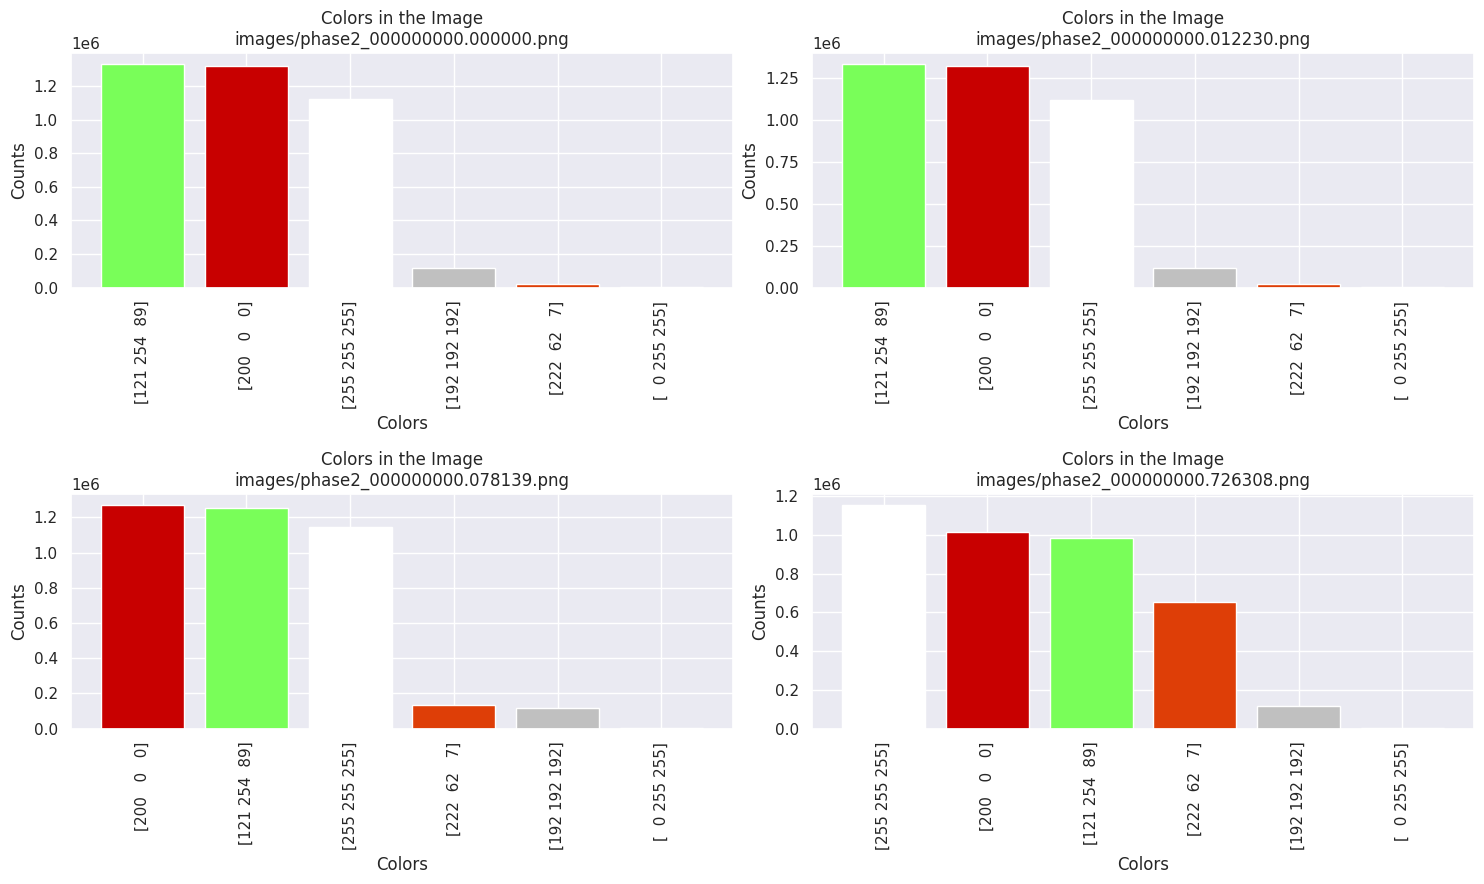

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image and convert it to a numpy array."""
    image = Image.open(image_path)
    return np.array(image)

def get_colors(image_np):
    """Get unique colors and their counts from the image numpy array."""
    colors, counts = np.unique(image_np.reshape(-1, image_np.shape[2]), axis=0, return_counts=True)
    return colors, counts

def create_dataframe(colors, counts):
    """Create a dataframe with colors and their counts."""
    df = pd.DataFrame({'colors': colors.tolist(), 'counts': counts})
    df['colors'] = df['colors'].apply(lambda x: np.array(x))
    df['labels'] = df['colors'].apply(lambda x: str(x))
    df['fraction'] = df['counts'] / df['counts'].sum()
    df.sort_values('counts', ascending=False, inplace=True)
    display(df)
    return df

def plot_color_histogram(df, ax, image_path):
    """Plot a bar chart of the colors using seaborn."""
    ax.bar(df['labels'], df['counts'], color=df['colors'] / 255.0)
    ax.set_xlabel('Colors')
    ax.set_ylabel('Counts')
    ax.set_title(f'Colors in the Image\n{image_path}')
    ax.set_xticks(range(len(df['labels'])))
    ax.set_xticklabels(df['labels'], rotation=90)

def main(image_paths):
    sns.set_theme(style="darkgrid")
    fig, axes = plt.subplots(2, 2, figsize=(15, 9))
    axes = axes.flatten()
    
    for i, image_path in enumerate(image_paths):
        print(f'Processing image: {image_path}')
        image_np = load_image(image_path)
        colors, counts = get_colors(image_np)
        df = create_dataframe(colors, counts)
        plot_color_histogram(df, axes[i], image_path)

    plt.tight_layout()
    plt.show()

# List of images to process
image_paths = [
    'images/phase2_000000000.000000.png',
    'images/phase2_000000000.012230.png',
    'images/phase2_000000000.078139.png',
    'images/phase2_000000000.726308.png',
]

# Run the main workflow
main(image_paths)
